# Analysis 2- Pat 1: Variation in NEU's Ranking from 2005 to 2016)  


# Part 2: Also a Radar Graph showing the score of NEU

In [1]:
my_university_name = ["Northeastern University"]

# The university into consideration is taken


# Import Packages
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plot
sns.set(style="ticks", color_codes=True)
plot.rcParams['figure.figsize'] = 16, 12

# Import Data

timesData = pd.read_csv("data/timesData.csv")
shanghaiData = pd.read_csv("data/shanghaiData.csv")
cwurData = pd.read_csv("data/cwurData.csv")

In [2]:
#Unique names of universities from all the three data are considered and are displayed in a sorted manner.
all_university_names = set(timesData.university_name).union(set(shanghaiData.university_name)).union(set(cwurData.institution))
all_university_names_list = [str(i) for i in (list(all_university_names))]

#print("Universities List")
#print("-----------------------------------")
#print ('\n'.join([ str(university) for university in sorted(all_university_names_list) ]))


times_plot_data = timesData[timesData.university_name.isin(my_university_name)][['world_rank','year']]
shanghai_plot_data = shanghaiData[shanghaiData.university_name.isin(my_university_name)][['world_rank','year']]
cwur_plot_data = cwurData[cwurData.institution.isin(my_university_name)][['world_rank','year']]

times_plot_data['source'] = 'Times'
shanghai_plot_data['source'] = 'Shanghai'
cwur_plot_data['source'] = 'CWUR'


In [3]:
# parse the first number in rank for data ranges
times_plot_data['world_rank'] = times_plot_data['world_rank'].str.split('-').str[0]
shanghai_plot_data['world_rank'] = shanghai_plot_data['world_rank'].str.split('-').str[0]

plot_data = times_plot_data.append(shanghai_plot_data).append(cwur_plot_data)
plot_data['world_rank'] = plot_data['world_rank'].astype(int)
ax = sns.pointplot(x='year',y='world_rank',hue='source',data=plot_data);

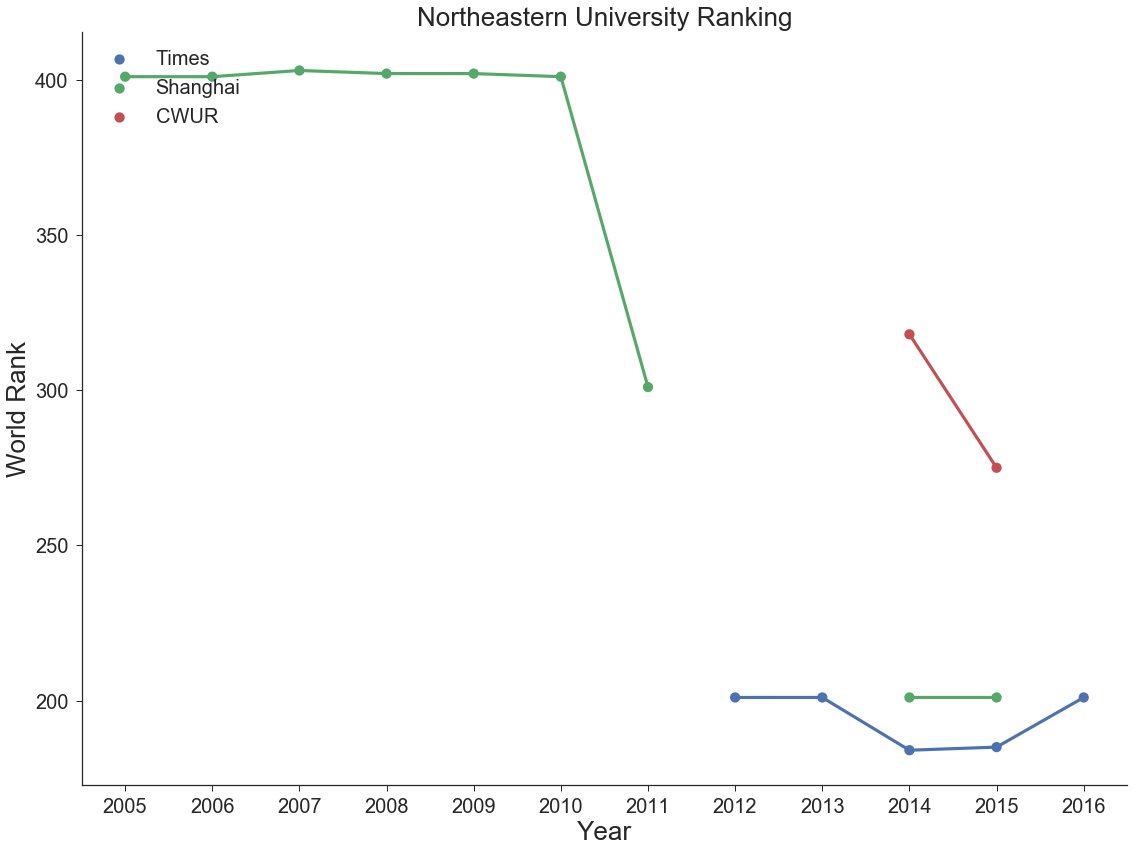

In [4]:
#Styling

plot.title(my_university_name[0] + " Ranking", fontsize=26)
plot.xticks(fontsize=20)
plot.yticks(fontsize=20)    
plot.ylabel("World Rank", fontsize=26)  
plot.xlabel("Year", fontsize=26) 
plot.tight_layout()
plot.legend(loc='upper left',fontsize=20)
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plot.show()
# Save File
plot.savefig('university.png')

# Analyzing Northeastern's teaching, income, research, citations in 2016

In [5]:
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as pot
import matplotlib.patches as patches
my_university_name = ["Northeastern University"]

timesdata = pd.read_csv('data/timesData.csv')

properties = ['teaching', 'international', 'research',
              'citations', 'income']
datarow = timesdata[timesdata.university_name.isin(my_university_name)].tail(1).reset_index(drop=True)
values = datarow[properties].astype(float).as_matrix().flatten()

title_text = '-'.join([my_university_name[0], str(datarow.year[0])])

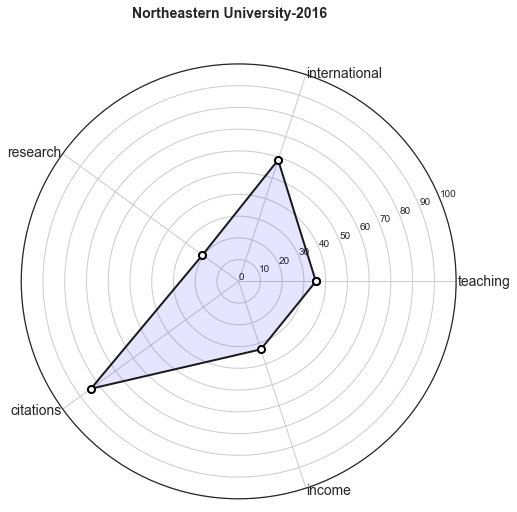

In [6]:
matplotlib.rc('axes', facecolor = 'white')

# Setting the color of the axis of the figure
fig = pot.figure(figsize=(10,8), facecolor='white')
fig.suptitle(title_text, fontsize=14, fontweight='bold')

# Setting a polar axis
axes = pot.subplot(111, polar=True)

# Ticks are set to the total number of properties considered
t = np.arange(0,2*np.pi,2*np.pi/len(properties))
pot.xticks(t, [])

# The y ticks are set form 0 to 100
pot.yticks(np.linspace(0,100,11))

# A polygon is drawn to represent the values
points = [(x,y) for x,y in zip(t,values)]
points.append(points[0])
points = np.array(points)
codes = [path.Path.MOVETO,] + \
        [path.Path.LINETO,]*(len(values) -1) + \
        [ path.Path.CLOSEPOLY ]
_path = path.Path(points, codes)
_patch = patches.PathPatch(_path, fill=True, color='blue', linewidth=0, alpha=.1)
axes.add_patch(_patch)
_patch = patches.PathPatch(_path, fill=False, linewidth = 2)
axes.add_patch(_patch)

# At every value point a circle is drawn to represent the value
pot.scatter(points[:,0],points[:,1], linewidth=2,
            s=50, color='white', edgecolor='black', zorder=10)

# Set axes limits
pot.ylim(0,100)

# ytick labels are to be drawn to make sure they fit properly
for i in range(len(properties)):
    angle_rad = i/float(len(properties))*2*np.pi
    angle_deg = i/float(len(properties))*360
    ha = "right"
    if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
    pot.text(angle_rad, 100.75, properties[i], size=14,
             horizontalalignment=ha, verticalalignment="center")



# Done
pot.savefig('radar-chart.png', facecolor='white')
pot.show()